We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [1]:
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-08-24 13:31:23--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.223.83, 13.227.223.117, 13.227.223.89, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.223.83|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [2]:
import pandas as pd
import numpy  as np

from pyearth import Earth
from pyearth import export

#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [3]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0 2020-08-24   24      8  2020      0       0             Afghanistan    AF   
1 2020-08-23   23      8  2020    105       2             Afghanistan    AF   
2 2020-08-22   22      8  2020     38       0             Afghanistan    AF   
3 2020-08-21   21      8  2020     97       2             Afghanistan    AF   
4 2020-08-20   20      8  2020    160       8             Afghanistan    AF   
5 2020-08-19   19      8  2020      0       0             Afghanistan    AF   
6 2020-08-18   18      8  2020      3       0             Afghanistan    AF   
7 2020-08-17   17      8  2020     45       5             Afghanistan    AF   
8 2020-08-16   16      8  2020    120       7             Afghanistan    AF   
9 2020-08-15   15      8  2020      7       0             Afghanistan    AF   

  countryterritoryCode  popData2019 continentExp  \
0                  AFG   38041757.0         Asia   
1                  AFG   38041757.0         Asia   
2                  AFG   38041757.0         Asia   
3                  AFG   38041757.0         Asia   
4                  AFG   38041757.0         Asia   
5                  AFG   38041757.0         Asia   
6                  AFG   38041757.0         Asia   
7                  AFG   38041757.0         Asia   
8                  AFG   38041757.0         Asia   
9                  AFG   38041757.0         Asia   

   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                           2.484112           
1                                           2.484112           
2                                           2.310619           
3                                           2.415766           
4                                           2.268560           
5                                           2.024092           
6                                           2.239644           
7                                           2.329020           
8                                           2.210729           
9                                           1.895286

Last check of our source dataframe.

In [4]:
df.count()

dateRep                                                       38283
day                                                           38283
month                                                         38283
year                                                          38283
cases                                                         38283
deaths                                                        38283
countriesAndTerritories                                       38283
geoId                                                         38283
countryterritoryCode                                          38219
popData2019                                                   38219
continentExp                                                  38283
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    35502
dtype: int64

We pivot to a country by column format.

In [5]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo

cases                                                              \
geoId         AD     AE     AF   AG   AI     AL     AM     AO      AR     AT   
dateRep                                                                        
2019-12-31   NaN    0.0    0.0  NaN  NaN    NaN    0.0    NaN     NaN    0.0   
2020-01-01   NaN    0.0    0.0  NaN  NaN    NaN    0.0    NaN     NaN    0.0   
2020-01-02   NaN    0.0    0.0  NaN  NaN    NaN    0.0    NaN     NaN    0.0   
2020-01-03   NaN    0.0    0.0  NaN  NaN    NaN    0.0    NaN     NaN    0.0   
2020-01-04   NaN    0.0    0.0  NaN  NaN    NaN    0.0    NaN     NaN    0.0   
...          ...    ...    ...  ...  ...    ...    ...    ...     ...    ...   
2020-08-20  19.0  435.0  160.0  1.0  0.0  158.0  210.0    0.0  6840.0  425.0   
2020-08-21   0.0  461.0   97.0  0.0  0.0  155.0  263.0   49.0  6693.0  308.0   
2020-08-22  21.0  391.0   38.0  0.0  0.0  152.0  158.0   29.0  8225.0  275.0   
2020-08-23   0.0  424.0  105.0  0.0  0.0  156.0  139.0   24.0  8159.0  216.0   
2020-08-24   0.0  390.0    0.0  0.0  0.0  152.0  176.0  103.0  7759.0  140.0   

            ... deaths                                                  
geoId       ...     VC   VE   VG   VI   VN    XK   YE     ZA   ZM   ZW  
dateRep     ...                                                         
2019-12-31  ...    NaN  NaN  NaN  NaN  0.0   NaN  NaN    NaN  NaN  NaN  
2020-01-01  ...    NaN  NaN  NaN  NaN  0.0   NaN  NaN    NaN  NaN  NaN  
2020-01-02  ...    NaN  NaN  NaN  NaN  0.0   NaN  NaN    NaN  NaN  NaN  
2020-01-03  ...    NaN  NaN  NaN  NaN  0.0   NaN  NaN    NaN  NaN  NaN  
2020-01-04  ...    NaN  NaN  NaN  NaN  0.0   NaN  NaN    NaN  NaN  NaN  
...         ...    ...  ...  ...  ...  ...   ...  ...    ...  ...  ...  
2020-08-20  ...    0.0  6.0  0.0  0.0  0.0   0.0  3.0  159.0  5.0  9.0  
2020-08-21  ...    0.0  8.0  0.0  1.0  0.0   0.0  2.0  195.0  5.0  1.0  
2020-08-22  ...    0.0  6.0  0.0  0.0  0.0  58.0  1.0  225.0  3.0  1.0  
2020-08-23  ...    0.0  6.0  0.0  0.0  1.0   0.0  4.0  144.0  0.0  1.0  
2020-08-24  ...    0.0  6.0  0.0  1.0  1.0  19.0  1.0   72.0  3.0  2.0  

[238 rows x 420 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we add to the current range and check our latest date.

In [6]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... deaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VC  VE  VG   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...    ...  ..  ..   
2021-08-20   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-08-21   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-08-22   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-08-23   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-08-24   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  
...         ..  ...  ..  ..  ..  ..  ..  
2021-08-20 NaN  NaN NaN NaN NaN NaN NaN  
2021-08-21 NaN  NaN NaN NaN NaN NaN NaN  
2021-08-22 NaN  NaN NaN NaN NaN NaN NaN  
2021-08-23 NaN  NaN NaN NaN NaN NaN NaN  
2021-08-24 NaN  NaN NaN NaN NaN NaN NaN  

[603 rows x 420 columns]

We need numerical data as inputs for a model, so we add a column representing the date as days since the start of the index.

In [7]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    603.000000
mean     301.000000
std      174.215384
min        0.000000
25%      150.500000
50%      301.000000
75%      451.500000
max      602.000000
Name: daynum, dtype: float64

We create a simple dataframe to contain the source values for our fitting approach. The typical progress of an outbreak seems to fit a Gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(-x))`. The measures are averaged by week to smooth out reporting lags.

In [8]:
def gumpdf(x, beta, mu):
    """Return PDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(expon) * np.exp(- (np.exp(expon))) / beta)

def gumcdf(x, beta, mu):
    """Return CDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(- (np.exp(expon))))

In [9]:
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

Running multiple wave analysis for Luxembourg (LU) with population 613894
Minimum number of cases is 2
Wave 01 beta  7.664 mu  91 fit 0.791 peak 2020-03-31 from 2020-03-15 to 2020-05-18 size 3497
Wave 02 beta  2.577 mu  84 fit 0.359 peak 2020-03-24 from 2020-03-19 to 2020-04-04 size 195
Wave 03 beta  4.996 mu 125 fit 0.820 peak 2020-05-04 from 2020-04-26 to 2020-05-20 size 132
Wave 04 beta  6.994 mu 142 fit 0.766 peak 2020-05-21 from 2020-05-11 to 2020-06-11 size 132
Wave 05 beta 13.123 mu 205 fit 0.836 peak 2020-07-23 from 2020-06-27 to 2020-10-06 size 3756
Wave 06 beta  3.390 mu 182 fit 0.513 peak 2020-06-30 from 2020-06-24 to 2020-07-15 size 234
Wave 07 beta 12.396 mu 176 fit 0.653 peak 2020-06-24 from 2020-06-07 to 2020-07-27 size 182
--- no data for wave


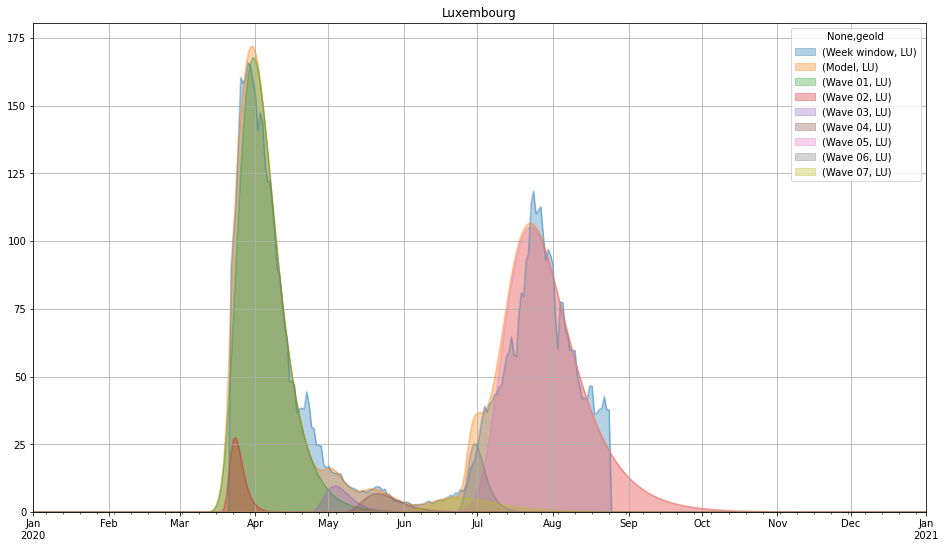

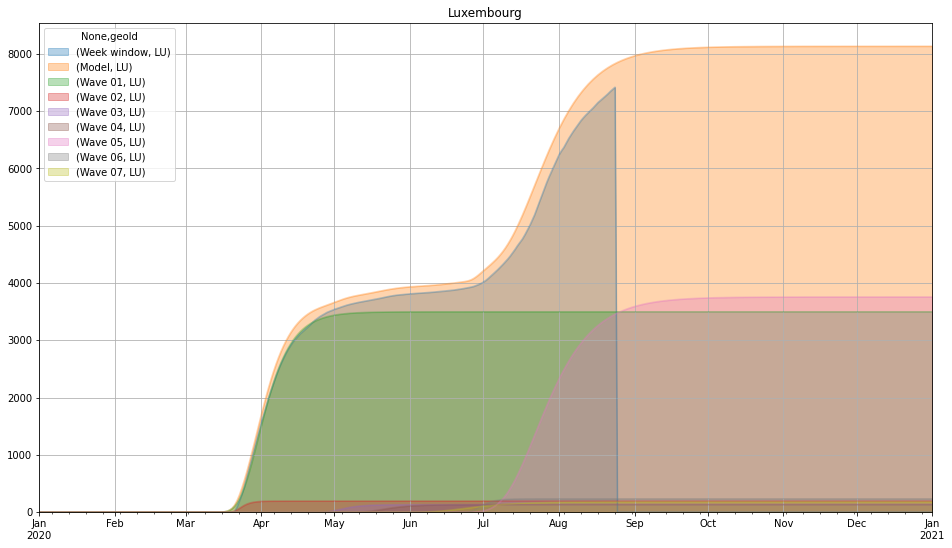

In [10]:
# Select countries to fit.
#countries = np.sort(df['geoId'].unique())
#countries = ['RS', 'IL', 'US', 'UK', 'BR', 'CH', 'DE', 'IT', 'ES', 'PT', 'FR', 'SE',
#             'NO', 'DK', 'BE', 'NL', 'NZ', 'CN', 'JP', 'RU', 'AT', 'ZA', 'IN', 'KW',
#             'AU', 'BO', 'SD', 'SI']
#countries = ['BB', 'BI', 'BM', 'BZ', 'CF', 'IS', 'JE', 'LV', 'ML', 'NO', 'PF', 'VC']
countries = ['LU']

# Choose whether to output plots per country.
showplots = True

measure  = 'cases'
smeasure = 'Week window' # smoothed
rmeasure = 'rcases'      # remaining
pmeasure = 'Model'       # predicted
wmeasure = 'Wave '       # waves

for country in countries:

    wave = 1

    df_geo[(pmeasure, country)] = 0
    df_geo[(smeasure, country)] = df_geo[measure][country].loc[:].rolling(7).mean()
    df_geo[(rmeasure, country)] = df_geo[smeasure][country]

    plotlist = [(smeasure, country), (pmeasure, country)]

    countryname = df[df['geoId'] == country]['countriesAndTerritories'].iloc[0]
    popdata = df[df['geoId'] == country]['popData2019'].iloc[0]

    #mincases = popdata / 1e6
    #mincases = 10
    #mincases = df_geo[smeasure][country].sum() / 5000
    mincases = max(popdata / 1e6, 2)

    print('Running multiple wave analysis for {} ({}) with population {:1.0f}'.format(
        countryname, country, popdata))
    print('Minimum number of cases is {:1.0f}'.format(mincases))

    while True:
        curwave = wmeasure + str((wave) + 1000)[-2:]
        df_geo[(curwave, country)] = 0

        df_pred = pd.DataFrame({'daynum':df_geo['daynum'],
                                measure:df_geo[rmeasure][country]})
        
        df_pred['gumdiv'] = df_pred[measure] / df_pred[measure].cumsum()
        df_pred = df_pred[(df_pred['gumdiv'] > 0) & (df_pred[measure] > mincases)]

        df_pred['linear'] = np.log(df_pred['gumdiv'])
        df_pred = df_pred[(df_pred['linear'] < -0.5) &
                          (df_pred['linear'] > -4.5)]

        if len(df_pred) <= 1:
            print('--- no data left')
            break

        eax = df_pred['daynum'].values.reshape(-1, 1)
        eay = df_pred['linear'].values.reshape(-1, 1)

        eamodel = Earth(minspan=1, penalty=0, endspan=0, thresh=1e-9, check_every=1)
        #eamodel = Earth(minspan=0)
        #eamodel = Earth()
        eamodel.fit(eax, eay)

        df_pred['earth'] = eamodel.predict(eax)

        daymin = df_pred['daynum'].min()
        daymax = df_pred['daynum'].max()

        #df_pred['gbgrad'] = np.gradient(df_pred['linear'])
        #df_pred['eagrad'] = np.gradient(df_pred['earth'])
        df_pred['gbgrad'] = df_pred['linear'] - df_pred['linear'].shift(1)
        df_pred['eagrad'] = df_pred['earth'] - df_pred['earth'].shift(1)

        fitmod = export.export_python_function(eamodel)

        df_pred['knot'] = ((abs(df_pred['eagrad'] - df_pred['eagrad'].shift(1)) > 1e-6) |
                           (df_pred['daynum'] == (daymin + 1)) |
                           (df_pred['daynum'] == daymax))
        df_pred['daycount'] = df_pred.reset_index().index

        df_knot = df_pred[df_pred['knot']][['daynum', 'daycount', 'eagrad']]
        df_knot['daysdata'] = df_knot['daycount'].shift(-1) - df_knot['daycount']
        df_knot['daystime'] = df_knot['daynum'].shift(-1) - df_knot['daynum']

        df_knot['cand'] = ((df_knot['eagrad'] < -1/30) &
                           (df_knot['daysdata'] >= 3))
        
        df_knot['since'] = df_knot['daynum'] - daymin
        df_knot['score'] = (df_knot['eagrad'] ** 2) * np.sqrt(df_knot['daysdata'] / np.sqrt(df_knot['since']))
        df_knot['choice'] = df_knot['score'] == df_knot[df_knot['cand']]['score'].max()

        choice = df_knot[df_knot['choice']]
        if len(choice) == 0:
            print('--- no data for wave')
            break

        lower = choice['daynum'].values[0]
        upper = choice['daysdata'].values[0] + lower

        df_pred = df_pred[(df_pred['daynum'] >= lower) &
                          (df_pred['daynum'] <= upper)].copy()

        slope = (fitmod([[upper]])[0] - fitmod([[lower]])[0]) / (upper - lower)
        intercept = fitmod([[lower]])[0] - (lower * slope)

        beta = - 1 / slope
        mu = beta * (intercept + np.log(beta))

        df_pred['pgumb'] = gumpdf(df_pred['daynum'], beta, mu)
        df_pred['scale'] = df_pred[measure] / df_pred['pgumb']

        final = df_pred['scale'].mean()
        fincv = df_pred['scale'].std() / final

        df_geo[(curwave, country)] = final * gumpdf(df_geo['daynum'], beta, mu)
        peak = df_geo[df_geo[(curwave, country)] == df_geo[(curwave, country)].max()].index.min()
        start = df_geo[(df_geo[(curwave, country)] >= 1) &
                       (df_geo[(curwave, country)].index < peak)].index.min()
        floor = df_geo[(df_geo[(curwave, country)] < 1) &
                       (df_geo[(curwave, country)].index > peak)].index.min()
        print('{} beta {:6.3f} mu {:3.0f} fit {:5.3f} peak {} from {} to {} size {:1.0f}'.format(
            curwave, beta, mu, (1 - fincv) ** 2, peak.date(), start.date(), floor.date(), final))
        
        df_geo[(pmeasure, country)] += df_geo[(curwave, country)]
        df_geo[(rmeasure, country)] -= df_geo[(curwave, country)]
        plotlist += [(curwave, country)]
        wave += 1
        
    if showplots:
        df_geo[plotlist].loc['20200101':'20210101'].plot(
            figsize=(16, 9), grid=True, kind='area', stacked=False, alpha=1/3, title=countryname)

        df_geo[plotlist].loc['20200101':'20210101'].cumsum().plot(
            figsize=(16, 9), grid=True, kind='area', stacked=False, alpha=1/3, title=countryname)

In [11]:
df_geo.reset_index(inplace=True)

In [12]:
df_out = df_geo.melt(id_vars=['index'], value_vars=[pmeasure])
df_out.columns = (['date', 'type', 'location', 'value'])
df_out.to_csv('zzcorlux.csv')

Keep exploring! Stay home, wash your hands, keep your distance.